<a href="https://colab.research.google.com/github/kotosham/projects/blob/main/13_feedforward_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

#from google.colab import drive

## Initialization

In [ ]:
#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
input_size = 784
hidden_size = 100
num_classes = 10
num_epoch = 2
batch_size = 100

lr = 0.001


# Create data sets and data loaders

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                           transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                           transform=transforms.ToTensor())

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
examples = iter(train_loader)
samples, labels = examples.next()

print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


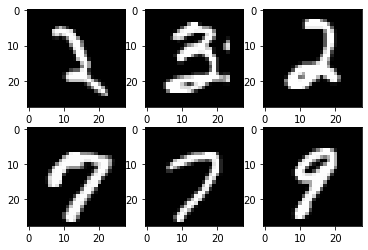

In [ ]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0], cmap = 'gray')

# Neural network architecture

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out


In [ ]:
model = NeuralNet(input_size, hidden_size, num_classes)

# Loss and optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Training

In [ ]:
n_total_steps = len(train_loader)

for epoch in range(num_epoch):
  for i, (images, labels) in enumerate(train_loader):
    #100, 1, 28, 28
    #100, 784
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    #forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    #backwards
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i-1) % 100 == 0:
      print(f'Epoch [{epoch+1}/{num_epoch}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')



Epoch [1/2], Step [2/600], Loss: 2.1905
Epoch [1/2], Step [102/600], Loss: 0.5078
Epoch [1/2], Step [202/600], Loss: 0.3290
Epoch [1/2], Step [302/600], Loss: 0.2187
Epoch [1/2], Step [402/600], Loss: 0.3841
Epoch [1/2], Step [502/600], Loss: 0.3130
Epoch [2/2], Step [2/600], Loss: 0.2147
Epoch [2/2], Step [102/600], Loss: 0.3409
Epoch [2/2], Step [202/600], Loss: 0.1807
Epoch [2/2], Step [302/600], Loss: 0.2508
Epoch [2/2], Step [402/600], Loss: 0.1703
Epoch [2/2], Step [502/600], Loss: 0.1775


# Test

In [ ]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)
    # value, index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc = 100.0*n_correct/n_samples

  print(f'accuracy = {acc}')



accuracy = 95.19
